# Breast Cancer Wisconsin (Diagnostic) Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
#autres

### Importer les data

In [2]:
df = pd.read_csv("data.csv")

### Afficher les information du dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Analyser la target

In [4]:
df["diagnosis"]

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

### Afficher les statistiques du dataset

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Drop les colonnes non utiles 

In [6]:
df = df.drop(["id"], axis = 1)
df = df.iloc[:, :-1]



### Transformer votre target en 0/1 

In [7]:
y = df["diagnosis"]
y = pd.get_dummies(y, drop_first= True)
X = df.drop(["diagnosis"], axis = 1)

### Normaliser vos features 

In [8]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

### Ploter la répartition de la target

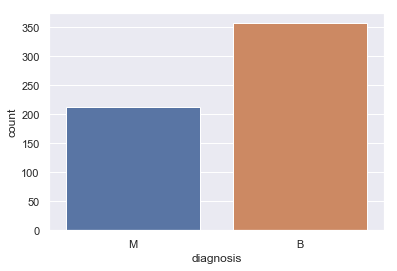

In [9]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="diagnosis", data=df)

### Faire une fonction qui permet d'afficher le % des gens qui on un cancer grave 

In [10]:
def cancergrave(df, target):
    percentage = (df[target][df[target] == "M"].count()) / df[target].count() * 100
    percentage = round(percentage, 2)
    print(str(percentage) + "%")

cancergrave(df, "diagnosis")

37.26%


### Affichier les colonnes du dataset

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Regrouper dans un dataFrame la target avec les 'data moyenne' 

In [12]:
mean_cols = [col for col in df.columns if 'mean' in col]
print(mean_cols)

df_mean = df[mean_cols]
df_mean["diagnosis"] = y

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


### Afficher la heatmap de ce dataFrame

diagnosis              1.000000
concave points_mean    0.776614
perimeter_mean         0.742636
radius_mean            0.730029
area_mean              0.708984
concavity_mean         0.696360
compactness_mean       0.596534
texture_mean           0.415185
smoothness_mean        0.358560
symmetry_mean          0.330499
Name: diagnosis, dtype: float64


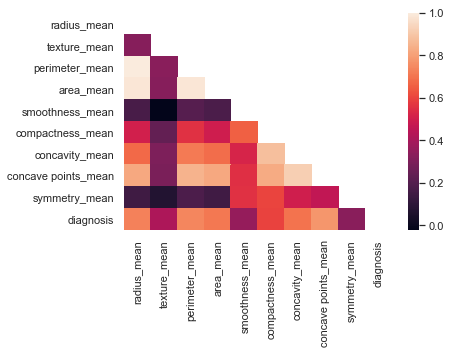

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = df_mean.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask)
print(corr["diagnosis"].sort_values(ascending=False))

### Feature importance
Cibler les features qui ont une corrélation importante avec la variable cible **diagnosis**.

### Afficher le graphique des malades en fonction de 'perimeter_mean'

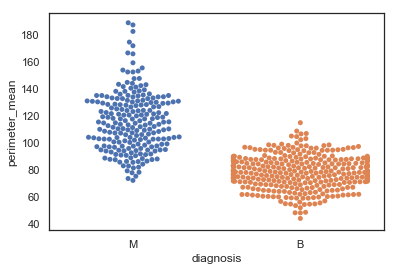

In [14]:
sns.swarmplot(x = "diagnosis", y = "perimeter_mean", data = df)

### Définir les features, la target et spliter les data 

In [15]:
df_mean = df_mean.drop("fractal_dimension_mean", axis = 1)
X= df_mean.drop("diagnosis", axis = 1)

X_scaled = preprocessing.scale(X)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

## Logistic Regression Model:
Expliquer pourquoi un modèle de régression logistique peut être adapter à notre problème. 

**Implémenter le modèle et afficher son accuracy.**

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
LR_accuracy = accuracy_score(y_test, y_pred).round(2)
print ("LogisticRegression : " + str(LR_accuracy) + "%")

LogisticRegression : 0.94%


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## SVM:

**Implémenter le modèle et afficher son accuracy.**

In [18]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_test)

SVM_accuracy = accuracy_score(y_test, y_pred).round(2)
print ("SVM : " + str(SVM_accuracy) + "%")

SVM : 0.93%


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Random Forest Model:
**Implémenter le modèle et afficher son accuracy.**

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf_rforest = RandomForestClassifier(random_state=0)
clf_rforest.fit(X_train, y_train)

y_pred = clf_rforest.predict(X_test)

rforest_accuracy = accuracy_score(y_test, y_pred).round(2)
print ("Random Forest : " + str(rforest_accuracy) + "%")

Random Forest : 0.92%


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## Naive Bayes:
**Implémenter le modèle et afficher son accuracy.**

In [20]:
from sklearn.naive_bayes import GaussianNB
clf_bayes = RandomForestClassifier()
clf_bayes.fit(X_train, y_train)

y_pred = clf_bayes.predict(X_test)

bayes_accuracy = accuracy_score(y_test, y_pred).round(2)
print ("Naive Bayes : " + str(bayes_accuracy) + "%")

Naive Bayes : 0.95%


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
print ("LogisticRegression : " + str(LR_accuracy) + "%")
print ("SVM : " + str(SVM_accuracy) + "%")
print ("Random Forest : " + str(rforest_accuracy) + "%")
print ("Naive Bayes : " + str(bayes_accuracy) + "%")

LogisticRegression : 0.94%
SVM : 0.93%
Random Forest : 0.92%
Naive Bayes : 0.95%


### Faire une boucle en faisant varier le nombre d'estimateur du 'RandomForestClassifier' afin de déterminer le meilleur paramètre 

In [22]:
df_accuracy = pd.DataFrame()

for i in range(1,100):
    clf_rforest = RandomForestClassifier(n_estimators=i, random_state=0)
    clf_rforest.fit(X_train, y_train)
    y_pred = clf_rforest.predict(X_test)
    df_accuracy.loc[i, "Score"] = (accuracy_score(y_test, y_pred))
    df_accuracy.loc[i, "index"] = i
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vect

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vect

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vect

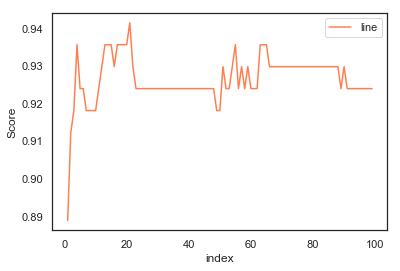

In [23]:
ser = pd.Series(rforest_accuracy)
sns.lineplot(data=df_accuracy, x = "index", y = "Score", color="coral", label="line")


In [24]:
df_accuracy["Score"].argmax()

21

### Implémenter le modèle 'RandomForestClassifier' avec ce paramètre

In [25]:
clf_rforest_opt = RandomForestClassifier(n_estimators=24, random_state=0)
clf_rforest_opt.fit(X_train, y_train)

y_pred = clf_rforest_opt.predict(X_test)

rforest_opt_accuracy = accuracy_score(y_test, y_pred).round(2)
print ("Random Forest : " + str(rforest_opt_accuracy) + "%")

Random Forest : 0.92%


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
